In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
from keras.layers import Embedding
from keras.layers import GRU
from keras.layers import Reshape
from sklearn.metrics import f1_score

In [4]:
from re import X
data = pd.read_csv('SquatData.csv')
X = data[data.columns[1:]]
Y = data[data.columns[0]].apply(lambda x: 1 if x == 'c' else 0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
callback = EarlyStopping(monitor='val_loss',patience=10)

### **Nerual Network**

In [11]:
model = Sequential()
model.add(Dense(126, input_dim=5032, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history=model.fit(X_train, Y_train, epochs =25,validation_split = .15, callbacks=[callback])

Epoch 1/25
3/3 [==============================] - 1s 136ms/step - loss: 0.6393 - accuracy: 0.4853 - val_loss: 0.4748 - val_accuracy: 0.7500
Epoch 2/25
3/3 [==============================] - 0s 42ms/step - loss: 0.4378 - accuracy: 0.7941 - val_loss: 0.4502 - val_accuracy: 0.8333
Epoch 3/25
3/3 [==============================] - 0s 39ms/step - loss: 0.3920 - accuracy: 0.8382 - val_loss: 0.5777 - val_accuracy: 0.7500
Epoch 4/25
3/3 [==============================] - 0s 33ms/step - loss: 0.3324 - accuracy: 0.8529 - val_loss: 0.3739 - val_accuracy: 0.8333
Epoch 5/25
3/3 [==============================] - 0s 39ms/step - loss: 0.3116 - accuracy: 0.8382 - val_loss: 0.4053 - val_accuracy: 0.8333
Epoch 6/25
3/3 [==============================] - 0s 39ms/step - loss: 0.2603 - accuracy: 0.9118 - val_loss: 0.5550 - val_accuracy: 0.8333
Epoch 7/25
3/3 [==============================] - 0s 30ms/step - loss: 0.2364 - accuracy: 0.9118 - val_loss: 0.4102 - val_accuracy: 0.9167
Epoch 8/25
3/3 [==========

### **Recurrent Nerual Network**

In [12]:
modelR = Sequential()
modelR.add(Reshape((68,74), input_shape=(5032,)))
modelR.add(Bidirectional(LSTM(200, return_sequences=True,activation='tanh')))
modelR.add(Bidirectional(LSTM(200,activation='tanh')))
modelR.add(Dense(256, activation='relu'))
modelR.add(Dense(1, activation='sigmoid'))
modelR.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
historyR = modelR.fit(X_train, Y_train, epochs =25,validation_split = .15,callbacks=[callback])

Epoch 1/25
3/3 [==============================] - 14s 2s/step - loss: 0.6909 - accuracy: 0.6471 - val_loss: 0.8706 - val_accuracy: 0.4167
Epoch 2/25
3/3 [==============================] - 2s 713ms/step - loss: 0.6502 - accuracy: 0.6471 - val_loss: 0.7713 - val_accuracy: 0.4167
Epoch 3/25
3/3 [==============================] - 2s 709ms/step - loss: 0.5939 - accuracy: 0.6471 - val_loss: 0.6916 - val_accuracy: 0.4167
Epoch 4/25
3/3 [==============================] - 2s 689ms/step - loss: 0.5834 - accuracy: 0.6471 - val_loss: 0.7560 - val_accuracy: 0.4167
Epoch 5/25
3/3 [==============================] - 2s 704ms/step - loss: 0.5547 - accuracy: 0.6618 - val_loss: 0.6047 - val_accuracy: 0.7500
Epoch 6/25
3/3 [==============================] - 3s 1s/step - loss: 0.5395 - accuracy: 0.7500 - val_loss: 0.6220 - val_accuracy: 0.7500
Epoch 7/25
3/3 [==============================] - 3s 1s/step - loss: 0.4487 - accuracy: 0.8382 - val_loss: 0.7204 - val_accuracy: 0.7500
Epoch 8/25
3/3 [============

### **SVM**

In [8]:
from sklearn import svm


In [9]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

### **Preformancen test**

In [10]:
Y_pred_NN = [1 if a > 0.5 else 0 for a in model.predict(X_test)]
print("NN Accuracy:",accuracy_score(Y_test,Y_pred_NN))
print("NN f1_score:",f1_score(Y_test,Y_pred_NN))

Y_pred_LSTM = [1 if a > 0.5 else 0 for a in modelR.predict(X_test)]
print("LSTM Accuracy:",accuracy_score(Y_test,Y_pred_LSTM))
print("LSTM f1_score:",f1_score(Y_test,Y_pred_LSTM))

Y_pred_svm = clf.predict(X_test)
print("SVM Accuracy:",accuracy_score(Y_test,Y_pred_svm))
print("SVM f1_score:",f1_score(Y_test,Y_pred_svm))

1/1 [==============================] - 0s 99ms/step
NN Accuracy: 0.8666666666666667
NN f1_score: 0.9090909090909091
1/1 [==============================] - 2s 2s/step
LSTM Accuracy: 0.8666666666666667
LSTM f1_score: 0.888888888888889
SVM Accuracy: 0.8
SVM f1_score: 0.8421052631578948


### **Learning** **Charts**

Neural Network


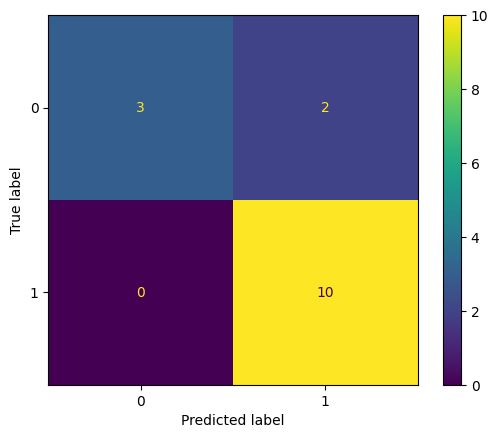

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Neural Network")
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred_NN))
cm.plot()

Recurrent Neural Network


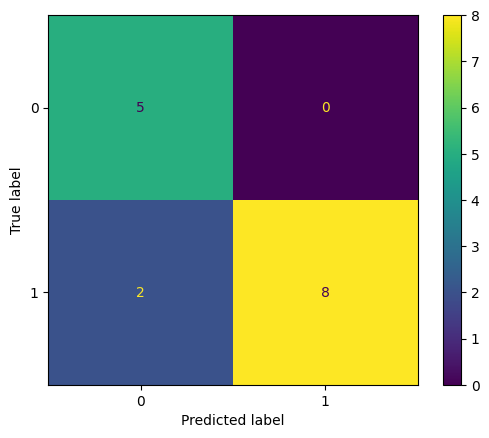

In [23]:
print("Recurrent Neural Network")
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred_LSTM))
cm.plot()

Support Vector Machine


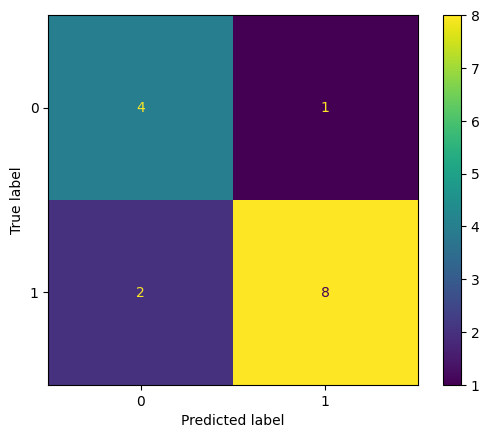

In [24]:
print("Support Vector Machine")
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred_svm))
cm.plot()